In [4]:

import PyROA
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import os
import glob
import scienceplots
import sys
sys.path.insert(0, os.path.abspath('..'))
import rm_utils
sys.path.insert(0, os.path.abspath('../..'))
import utils
np.random.seed(2) 
torch.manual_seed(2)

In [89]:
files = glob.glob('pyroa_fits/3C273*')[2:]


In [90]:
files


['pyroa_fits/3C273_0_gri_seg3_5_det',
 'pyroa_fits/3C273_0_epoch3_det',
 'pyroa_fits/3C273_0_gri_seg3_10_det']

3C273_0_GRI_SEG3_5_DET t1=0.17810090824142433,t2='neh',delt=0.680838574995597
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      0.178  (+     0.044 -     0.044)


/var/folders/f7/kj3k_2wx32z5vc93mdwsypn00000gn/T/ipykernel_91859/2386554870.py:36: RuntimeWarning: invalid value encountered in double_scalars
  mu = np.log(mean**2/np.sqrt(mean**2 + sig**2))
/var/folders/f7/kj3k_2wx32z5vc93mdwsypn00000gn/T/ipykernel_91859/2386554870.py:37: RuntimeWarning: invalid value encountered in double_scalars
  stddev2 = np.log( 1.0+ (sig**2)/(mean**2))


Mean Delay, error:      0.072  (+     0.037 -     0.044)


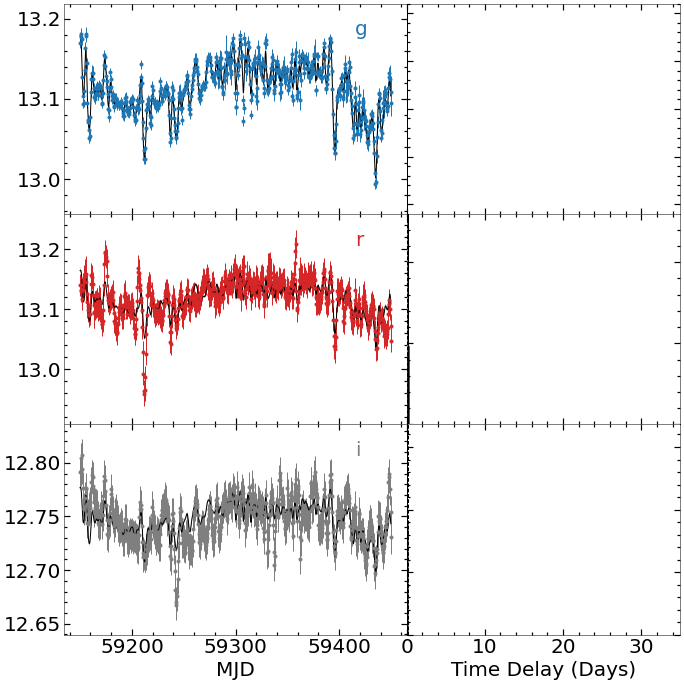

3C273_0_EPOCH3_DET t1=1.1094060768323588,t2='neh',delt=9.818182679123055
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      1.119  (+     0.820 -     1.635)
Mean Delay, error:     26.068  (+    14.836 -    15.975)


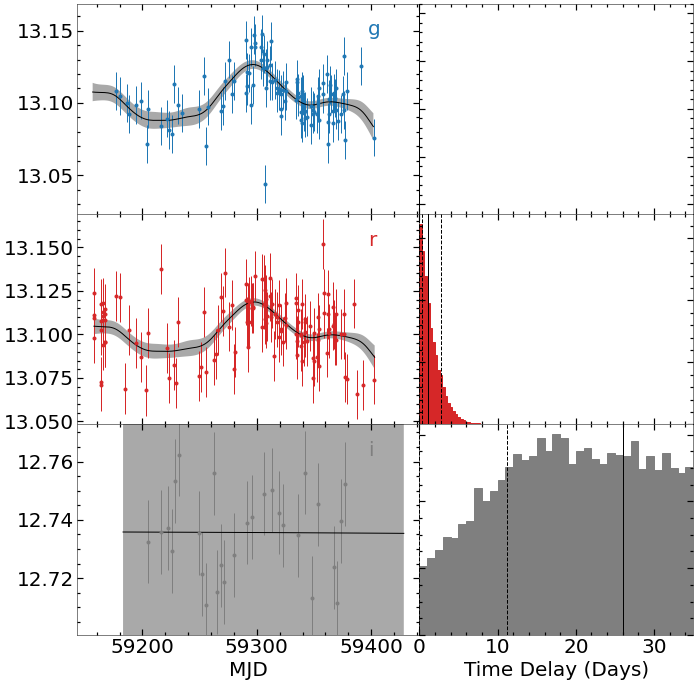

3C273_0_GRI_SEG3_10_DET t1=1.8619445860529953,t2='neh',delt=9.79931260938801
Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:      1.843  (+     1.322 -     1.590)
Mean Delay, error:     12.206  (+     4.039 -     4.127)


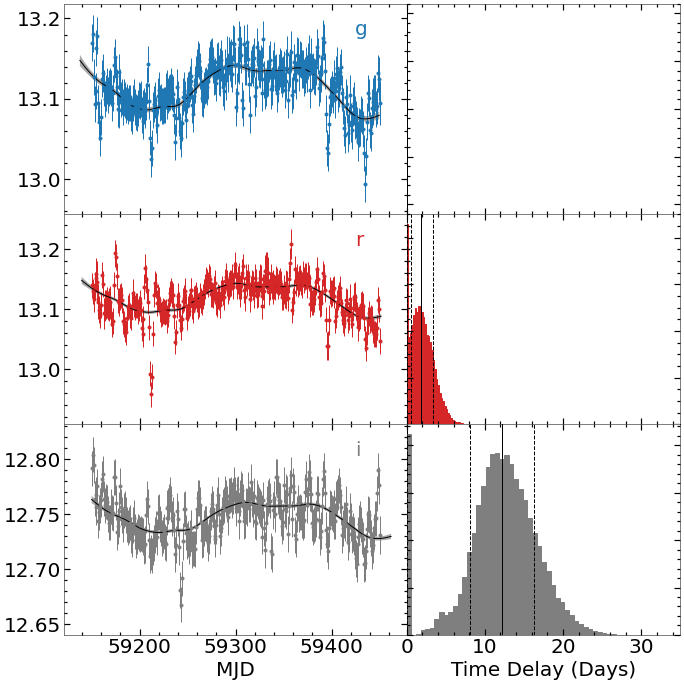

In [91]:
filters = ['g','r','i']
obj = '3C273'
for file in files:
    fit = utils.load_obj(file)
    if fit.datadir.find('../..') < 0:
        fit.datadir = os.path.join('../..',fit.datadir)
    t1 = fit.params[5]
    t2 = 'neh'
    delt = fit.params[-1]
    print(file.split('/')[-1].upper(),f'{t1=},{t2=},{delt=}')
    fit.samples_flat = fit.samples_flat[:-5000]
    sp = os.path.join('pyroa_fits',f'{obj}_fit_plots',file.split('/')[-1])
    ploot(fit,figsize=[10,10],save_file='')
    

    
    
    

In [85]:
filters=['g','i']

inc_window_priors = [[0.0, 20.0], [0, 30.0], [-50.0, 50.0], [0.01,10], [0.0, 10.0]]
psi_types = ["LogGaussian","LogGaussian"]
fit17 = PyROA.Fit('../../datasets/ZTF_rm_segs/3C273/epoch3_det/', '3C273',filters,inc_window_priors, Nburnin=5000,Nsamples=10000, delay_dist=True, add_var=True, psi_types=psi_types,init_delta=1)


Initial Parameter Values
      A0       B0    σ0         A1       B1    τ1    Δ1    σ1    Δ
--------  -------  ----  ---------  -------  ----  ----  ----  ---
0.017862  13.1052  0.01  0.0143147  12.7356     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [17:42<00:00,  9.41it/s]

Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: i
Mean Delay, error:   23.96439  (+  13.89115 -  16.89413)


Best Fit Parameters
       A0       B0          σ0           A1       B1       τ1       Δ1          σ1        Δ
---------  -------  ----------  -----------  -------  -------  -------  ----------  -------
0.0122472  13.1058  0.00138577  0.000310527  12.7355  23.9644  6180.94  0.00699458  9.76667


In [80]:
save_fn = '3C273_1_epoch3_det'
with open(f'pyroa_fits/{save_fn}', 'wb') as f:
            pickle.dump(fit16, f, pickle.HIGHEST_PROTOCOL)

/var/folders/f7/kj3k_2wx32z5vc93mdwsypn00000gn/T/ipykernel_91859/2386554870.py:36: RuntimeWarning: invalid value encountered in double_scalars
  mu = np.log(mean**2/np.sqrt(mean**2 + sig**2))
/var/folders/f7/kj3k_2wx32z5vc93mdwsypn00000gn/T/ipykernel_91859/2386554870.py:37: RuntimeWarning: invalid value encountered in double_scalars
  stddev2 = np.log( 1.0+ (sig**2)/(mean**2))


Mean Delay, error:      0.000  (+     0.000 -     0.000)
Mean Delay, error:     23.964  (+    13.891 -    16.894)


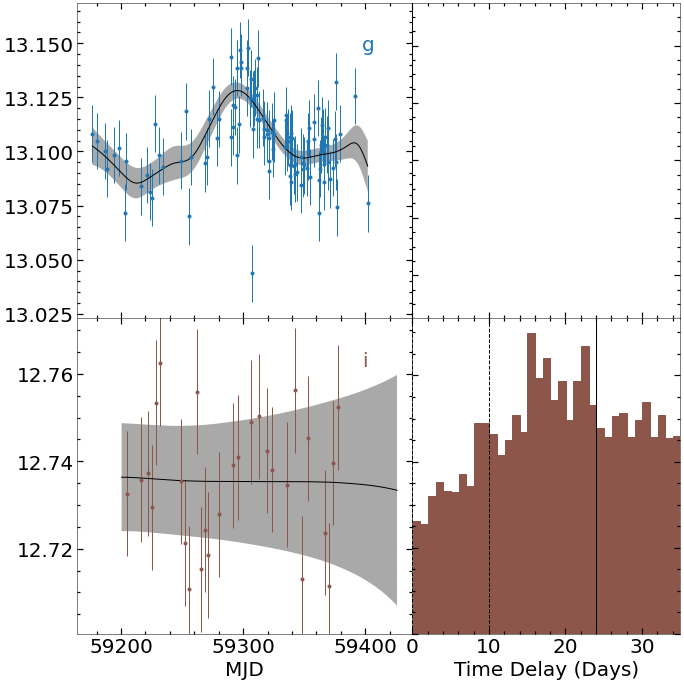

In [86]:
ploot(fit17,figsize=[10,10],save_file='pyroa_fits/3C273_fit_plots/3C273_1_epoch3_gi_det')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import interpolate
import emcee
from tqdm import tqdm
from multiprocessing import Pool
from itertools import chain
from tabulate import tabulate
import corner
from astropy.modeling import models
import os
import pickle
import numba
from numba import jit
from numba import prange
from numba.typed import List
from numba import generated_jit, types
from scipy import special
import scipy.special
import matplotlib
from astropy.modeling import models
from scipy import signal
from scipy.ndimage import gaussian_filter1d
from scipy.integrate import quad
import csv
from pandas import DataFrame

def Gaussian(mean, sig, t, conv):
    if (conv==True):
        mean = 0.0
    return np.exp(-0.5*((t-mean)/sig)**2)

def LogGaussian(mean, sig, t, min_delay, conv):
    mean = mean - min_delay # set zero point to min delay    
    mu = np.log(mean**2/np.sqrt(mean**2 + sig**2))
    stddev2 = np.log( 1.0+ (sig**2)/(mean**2))

    if (conv == True):
        t = t + mean # Shift time grid to centre on mean
        psi = np.zeros(len(t))
        ts = t[t>0]
        psi[t>0] = (1.0/(ts*np.sqrt(stddev2 *2.0*np.pi)))*np.exp(- 0.5 * (np.log(ts) - mu) ** 2 / stddev2)
    else:
        try:
            t_shift = t - min_delay   
            psi = np.zeros(len(t_shift))
            ts = t_shift[t_shift>0]
            psi[t_shift>0] = (1.0/(ts*np.sqrt(stddev2 *2.0*np.pi)))*np.exp(- 0.5 * (np.log(ts) - mu) ** 2 / stddev2)
        except:
            psi = np.zeros(len(mu))        
            for i in range(len(min_delay)):
                t_shift = t - min_delay[i]
                if (t_shift > 0):
                    psi[i] = (1.0/(t_shift*np.sqrt(stddev2[i] *2.0*np.pi)))*np.exp(- 0.5 * (np.log(t_shift) - mu[i]) ** 2 / stddev2[i])
                else:
                    psi[i]=0.0
    return psi

def ploot(Fit,figsize=[15,20],save_file=''):

    plt.style.use(['science','no-latex'])        
    plt.rcParams.update({
            "font.family": "Sans", 
            "font.serif": ["DejaVu"],
            "figure.figsize":figsize,
            "font.size": 20,
            "xtick.major.size" : 6,
            "xtick.major.width": 1.2,
            "xtick.minor.size" : 3,
            "xtick.minor.width" : 1.2,
            "ytick.major.size" : 6,
            "ytick.major.width": 1.2,
            "ytick.minor.size" : 3,
            "ytick.minor.width" : 1.2}) 



    datadir =Fit.datadir
    objName = Fit.objName
#     filters=Fit.filters
    data=[]
    for i in range(len(filters)):
        file = datadir + str(objName) +"_"+ str(filters[i]) + ".dat"
        data.append(np.loadtxt(file))


    cmap = matplotlib.cm.get_cmap('tab10')
    band_colors=[]
    n = np.arange(0.05, 1.0 + 0.5/len(filters), 1.0/len(filters))
    for i in range(len(filters)):
        band_colors.append(cmap(n[i]))

    samples_flat = Fit.samples_flat
    t = Fit.t
    X=Fit.X
    errs= Fit.X_errs
    
    
    transpose_samples = np.transpose(samples_flat)      
    

        

    Nchunk = 2
    if (Fit.AccDisc == False):
        Nchunk+=1
       
        
    
    if (Fit.add_var == True):
        Nchunk +=1
    if (Fit.delay_dist == True and Fit.AccDisc == False):
        Nchunk+=1
        
        if (Fit.delay_ref_pos == 0):
            transpose_samples=np.insert(transpose_samples, [2], np.array([0.0]*len(transpose_samples[1])), axis=0)              #Insert zero for reference delay dist
        else:
            transpose_samples=np.insert(transpose_samples, [3], np.array([0.0]*len(transpose_samples[1])), axis=0)              #Insert zero for reference delay dist
        
        
        param_delete=2
    else:
        param_delete=1
        

                 
    Npar =  Nchunk*len(data) + 1
    if (Fit.AccDisc == True):
        Npar =  Nchunk*len(data) + 3
        
    pos = Fit.delay_ref_pos*Nchunk + 2
    if (Fit.AccDisc == False):
        transpose_samples= np.insert(transpose_samples, pos, np.array([0.0]*len(transpose_samples[1])), axis=0)    #Insert zero for reference delay 

    

    chunk_size = Nchunk#int((Npar - 1)/len(data))

           
    samples_chunks = [transpose_samples[i:i + chunk_size] for i in range(0, len(transpose_samples), chunk_size)]
    
            
    if (Fit.AccDisc == True):
        T1 = np.percentile(samples_chunks[-1][0], [16, 50, 84])[1]
        b = np.percentile(samples_chunks[-1][1], [16, 50, 84])[1]        
                #Integral and interpolate
        Is=[]
        bs = np.linspace(0.34, 10.0, 5000)
        for i in range(len(bs)):
            Is.append(quad(integrand, 0, np.inf, args=(bs[i]))[0])
        integral= interpolate.interp1d(bs, Is, kind="linear", fill_value="extrapolate")
        Is=[]
        bs = np.linspace(0.34, 10.0, 5000)
        for i in range(len(bs)):
            Is.append(quad(integrand2, 0, np.inf, args=(bs[i]))[0])
        integral2= interpolate.interp1d(bs, Is, kind="linear", fill_value="extrapolate")
        
        
    fig = plt.figure(100)
    gs = fig.add_gridspec(len(filters), 2, hspace=0, wspace=0, width_ratios=[5, 4])
    axs= gs.subplots(sharex='col') 
    tss=[]    
    for j in range(len(filters)):

        #Read in parameter values
        A = np.percentile(samples_chunks[j][0], [16, 50, 84])[1]
        B = np.percentile(samples_chunks[j][1], [16, 50, 84])[1]
        if (Fit.AccDisc == False):
            tau = np.percentile(samples_chunks[j][2], [16, 50, 84])[1]
            tau_samples=samples_chunks[j][2]
            if (Fit.delay_dist == True):
                tau_rms = np.percentile(samples_chunks[j][3], [16, 50, 84])[1]
        else:
            l_0 = Fit.wavelengths[0]
            l = Fit.wavelengths[j] - l_0        
            l_delay_ref = Fit.wavelengths[Fit.delay_ref_pos] - l_0
            tau_0 = (l_0*1e-10*1.3806e-23*T1/(6.63e-34*3e8))**(1.0/b)
            tau = tau_0*((l/l_0)**(1.0/b))*8.0*(np.pi**4)/(15.0*integral(b)) - tau_0*((l_delay_ref/l_0)**(1.0/b))*8.0*(np.pi**4)/(15.0*integral(b)) #Measure mean from delay reference
            tau_rms = np.sqrt((tau_0**2)*((l/l_0)**(2.0/b))*integral2(b)/integral(b))
            
            if (j==0):
                min_delay = tau
            
            tau_samples = (l_0*1e-10*1.3806e-23*samples_chunks[-1][0]/(6.63e-34*3e8))**(1.0/samples_chunks[-1][1])*((l/l_0)**(1.0/samples_chunks[-1][1]))*8.0*(np.pi**4)/(15.0*integral(samples_chunks[-1][1])) - (l_0*1e-10*1.3806e-23*samples_chunks[-1][0]/(6.63e-34*3e8))**(1.0/samples_chunks[-1][1])*((l_delay_ref/l_0)**(1.0/samples_chunks[-1][1]))*8.0*(np.pi**4)/(15.0*integral(samples_chunks[-1][1]))
        tss.append(tau)

        
        mjd = data[j][:,0]
        flux = data[j][:,1]
        err = data[j][:,2] 
        
        
        #Add extra variance
        if (Fit.add_var == True):
            sig = np.percentile(samples_chunks[j][-1], [16, 50, 84])[1]  
            err = np.sqrt(err**2 + sig**2)
        
        ts, model, errs = Fit.models[j]
        

        axs[j][0].errorbar(mjd, flux , yerr=err, ls='none', marker=".", color=band_colors[j])
        axs[j][0].plot(ts, model, color="black")
        axs[j][0].fill_between(ts , model+errs,  model-errs, facecolor="darkgrey", edgecolor='none', rasterized=True, antialiased=True)
        
        if (Fit.include_slow_comp == True):
            slow_comp = Fit.slow_comps[j]
            axs[j][0].plot(t, slow_comp(t)+B, linestyle="dashed", color="black")          
        
        length=abs(max(flux)-min(flux))
        axs[j][0].set_ylim(min(flux)-0.2*length, max(flux)+0.2*length)
        axs[j][0].set_xlabel("MJD")
        
        axs[j][0].annotate(filters[j], xy=(0.85, 0.85), xycoords='axes fraction', color=band_colors[j], fontsize=20) 
        
        
      #  if (i>0 and i!=Fit.delay_ref_pos):
         #   smpls = peaktomean(samples_chunks[j][2], samples_chunks[0][2], samples_chunks[j][3])
       # else:
        smpls = tau_samples
        if (Fit.psi_types[j] == "TruncGaussian" and Fit.AccDisc == False):
            smpls = peaktomean(samples_chunks[j][2], samples_chunks[0][2], samples_chunks[j][3])
        
        frq, edges = np.histogram(smpls, bins=50)        
        if (Fit.delay_dist==True or Fit.AccDisc == True):
            
            
            # Transfer Function
            if (Fit.psi_types[j] == "Gaussian"and Fit.AccDisc == False):
                psi = Gaussian(tau, tau_rms, np.linspace(-4.0*tau_rms, 4.0*tau_rms, 200), conv = False)
            elif(Fit.psi_types[j] ==  "Uniform"and Fit.AccDisc == False):
                psi = Uniform(tau, tau_rms, np.linspace(-4.0*tau_rms, 4.0*tau_rms, 200), conv = False) 
            elif(Fit.psi_types[j] ==  "TruncGaussian"and Fit.AccDisc == False):
                psi = TruncGaussian(tau, tau_rms, np.linspace(-4.0*tau_rms, 4.0*tau_rms, 200), np.percentile(samples_chunks[0][2], [16, 50, 84])[1], conv = True) 
            elif(Fit.psi_types[j] == "LogGaussian"and Fit.AccDisc == False):
                psi = LogGaussian(tau, tau_rms, np.linspace(tau-4.0*tau_rms,tau+ 4.0*tau_rms, 200), np.percentile(samples_chunks[0][2], [16, 50, 84])[1], conv=False)
            elif(Fit.psi_types[j] == "InverseGaussian"and Fit.AccDisc == False):
                psi = InverseGaussian(tau, tau_rms, np.linspace(tau-4.0*tau_rms,tau+ 4.0*tau_rms, 200), np.percentile(samples_chunks[0][2], [16, 50, 84])[1], conv=False)    
            elif (Fit.AccDisc == True):
                if (j>0):
                    psi = AccDisc(Fit.wavelengths[0], Fit.wavelengths[j] - Fit.wavelengths[0], T1, b, integral, np.linspace(tau-4.0*tau_rms,tau+ 4.0*tau_rms, 200), min_delay,conv = False)
                else:
                    psi = np.ones(200)
                
                        
                
            norm = np.max(psi)
            norm = norm/max(frq)
            if (Fit.delay_ref_pos>0 and j==0 and Fit.AccDisc == False):
                norm = 1.0
            
        else:
            norm=1.0/max(frq)

        
                

        axs[j][1].bar(edges[:-1], frq*norm, width=np.diff(edges), edgecolor=band_colors[j], align="edge", color=band_colors[j])  
        #axs[j][1].hist(tau_samples, color=band_colors[j], bins=50, density=True)
        axs[j][1].axvline(x = np.percentile(smpls, [16, 50, 84])[1], color="black")
        mean_delay = np.percentile(smpls, [16, 50, 84])
        print('Mean Delay, error: %10.3f  (+%10.3f -%10.3f)'%(mean_delay[1], mean_delay[1] - mean_delay[0], mean_delay[2] - mean_delay[1]))
        
        axs[j][1].axvline(x = np.percentile(smpls, [16, 50, 84])[0] , color="black", ls="--")
        axs[j][1].axvline(x = np.percentile(smpls, [16, 50, 84])[2], color="black",ls="--")
        axs[j][1].axvline(x = 0, color="black",ls="--")    
        axs[j][1].set_xlabel("Time Delay (Days)")

        if (Fit.delay_dist==True or Fit.AccDisc == True):
            if (j>0 and Fit.AccDisc == False):

                tau_rms = np.percentile(samples_chunks[j][3], [16, 50, 84])
            
                length=10.0*tau_rms[1]
                taus=np.arange(tau - 5.0*tau_rms[1], tau + 5.0*tau_rms[1], length/500)
                if(Fit.psi_types[j] == "LogGaussian" or Fit.psi_types[j] == "InverseGaussian"):
                    taus=np.linspace(tss[0]-tau_rms[1], np.percentile(samples_chunks[-2][2], [16, 50, 84])[1] + 5.0*tau_rms[1]  , 600)
            
                #Limits for errors
                up=[]
                low=[]
                Gs = []
                for k in range(len(taus)):
                    rms_samples = samples_chunks[j][3]
                    mean_samples = samples_chunks[j][2]

                    # Transfer Function
                    if (Fit.psi_types[j] == "Gaussian"and Fit.AccDisc == False):
                        psi = Gaussian(mean_samples, rms_samples, taus[k], conv = False)
                    elif(Fit.psi_types[j] ==  "Uniform"and Fit.AccDisc == False):
                        psi = Uniform(mean_samples, rms_samples, taus[k], conv = False)
                    elif(Fit.psi_types[j] ==  "TruncGaussian"and Fit.AccDisc == False):  
                        psi = TruncGaussian(mean_samples, rms_samples, taus[k], samples_chunks[0][2], conv = False)  
                    elif(Fit.psi_types[j] == "LogGaussian"and Fit.AccDisc == False):
                        psi = LogGaussian(mean_samples, rms_samples, taus[k], samples_chunks[0][2], conv = False)   
                    elif(Fit.psi_types[j] == "InverseGauss"and Fit.AccDisc == False):
                        psi = InverseGaussian(mean_samples, rms_samples, taus[k], samples_chunks[0][2], conv = False)       
                    elif (Fit.AccDisc == True):
                        psi = AccDisc(l_0, l, samples_chunks[-1][0], samples_chunks[-1][1], integral, taus[k], min_delay, conv = False)
                     
                    percent =  np.percentile(psi, [16, 50, 84])
                    up.append(percent[0])
                    Gs.append(percent[1])
                    low.append(percent[2])

#                 axs[j][1].plot( taus, Gs, color="black", lw=1.5)                    
                
#                 axs[j][1].fill_between(taus, up, low, color="black", alpha=0.5, edgecolor='none', rasterized=True, antialiased=True)
                


    length = max(tss)-min(tss)
    axs[-1][1].set_xlim(-5,35)
#     axs[-1][1].set_xlim(min(tss)-1.0*length, max(tss)+1.0*length)
            
            
            
            
            
            
            
        
    for ax in axs.flat:
        ax.label_outer()    
    
    plt.tight_layout() 
    if save_file: plt.savefig(save_file)
    plt.show() 
    
